In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.ndimage import find_objects
from matplotlib.colors import Normalize
from src.cpm_basic import CellularPottsModel

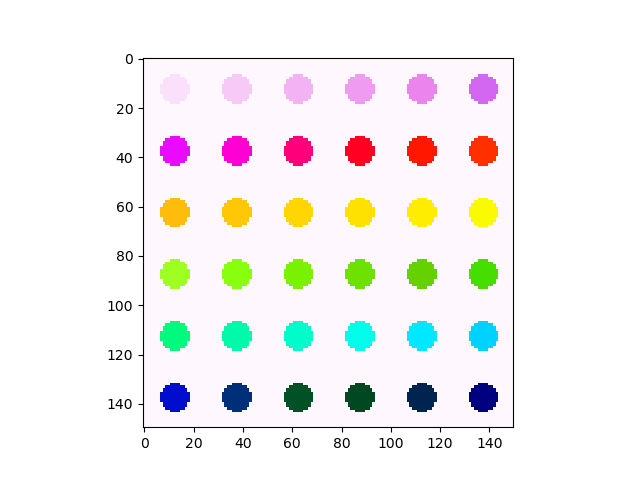

In [2]:
n_cells=65
n_types=2 
T=500
L=150
 
medium_adhesion = 1
J = 100
adhessions= np.array([[0, medium_adhesion, medium_adhesion],  
                      [medium_adhesion, J, J],
                      [medium_adhesion, J, J]]) 
volume_coefficient= 0 #np.array([0, 50, 50])
perimeter_coefficient= 0 # np.array([0, 0.1, 0.1])  
lattice_type="circle"
object_volumes= None # Is default set in the CPM class if none
periodic=False


cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, volume_coefficient=volume_coefficient, perimeter_coefficient=perimeter_coefficient,
                         adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes, periodic=periodic)
cpm.run_animation(steps_per_frame=2500, frames=220)

In [3]:
a=cpm.run_a_sim(steps=1000000)
np.save("saves/init_grids/initial_grid.npy", a)

100%|██████████| 1000000/1000000 [00:15<00:00, 63677.21it/s]
